## importing the libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [21]:
gold_data = pd.read_csv('gld_price_data.csv')

In [22]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [23]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [24]:
gold_data.shape

(2290, 6)

In [25]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [26]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [29]:
gold_data=gold_data.drop(columns='Date',axis=1)

## correlation

In [30]:
correlation = gold_data.corr()

ValueError: Format specifier missing precision

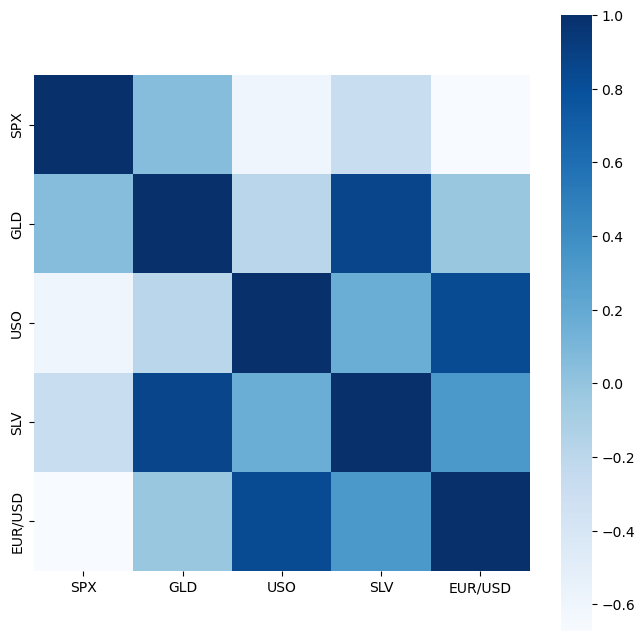

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='1.f',annot=True,annot_kws={'size':8},cmap='Blues')

In [33]:
# correlation values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\akash\AppData\Local\Temp\ipykernel_12780\2840989287.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='red')
C:\Users\akash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

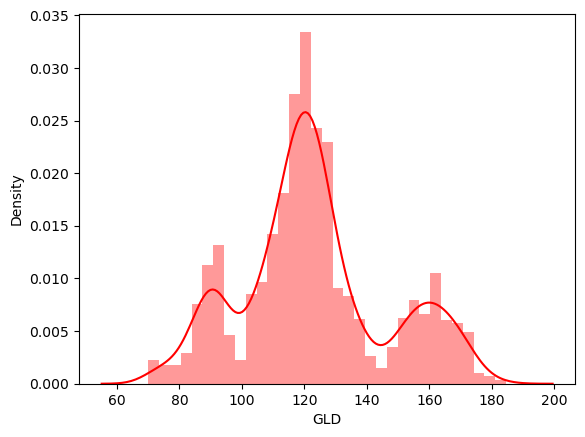

In [34]:
# distributon of the gold price
sns.distplot(gold_data['GLD'],color='red')

## spliting train and test

In [41]:
x=gold_data.drop(['GLD'],axis=1)
y=gold_data['GLD']

In [45]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [46]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

## model Training

In [55]:
regressor = RandomForestRegressor(n_estimators=100)

In [56]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

## Evaluation

In [57]:
test_data_pred = regressor.predict(x_test)
print(test_data_pred)

[163.55660014 127.57469872 124.31539948 119.64819899 125.87809908
  85.94449802 171.88620168 136.45599998 106.88000057 132.89710192
 120.48439932 124.86530048 143.0966988  104.55509993  80.93419904
 118.74460014 140.12510004  90.25860083  91.5921995  128.29450224
 125.70559928 148.03609986 116.8417018  153.23449937 129.40149835
 129.51740043 118.40980084 111.35000021 167.71940199 158.35699885
 125.99980163 154.08830113 127.12509962 122.51569767 116.21010138
 154.80600037 115.2082     120.54660137 103.92420195 105.50850058
 134.93769882  85.54009993 156.22240083 121.35569978 122.30730099
 155.29640013 120.33750016 116.74440003 168.78560325 116.51080054
 136.8007012  161.75019848 158.69320051 153.40020092 123.8702002
 117.05760042 167.18130013 117.27240004 165.6943002   84.34229987
 121.39729896 122.18380008 120.11460015 172.03589906 119.02719946
 180.88699639 162.2151032  137.14470158 115.55780021  92.52010048
 172.01290016 117.57819957 117.77889817 125.46570021 147.10709962
  91.182400

In [59]:
## R Squared error
error_score = metrics.r2_score(y_test,test_data_pred)
print(error_score)

0.986053705875229


In [60]:
y_test = list(y_test)

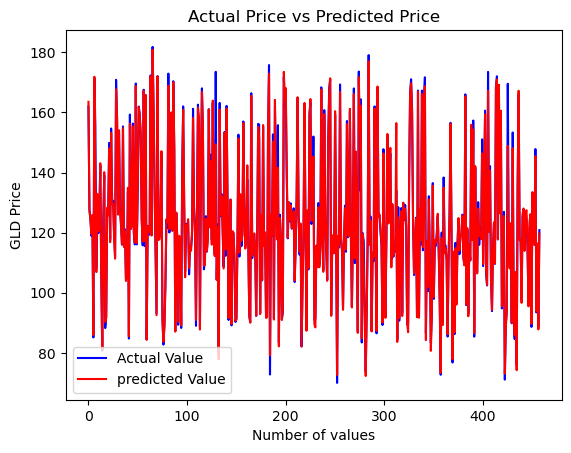

In [62]:
plt.plot(y_test,color='Blue',label = 'Actual Value')
plt.plot(test_data_pred,color='red',label='predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [64]:
input=np.array([1447.160034,78.470001,15.1800,1.471692])
reshaped_input = input.reshape(1, -1)
prediction=regressor.predict(reshaped_input)

print(f"The Price of your Gold is: {prediction[0]} USD")

The Price of your Gold is: 85.10950020999995 USD


C:\Users\akash\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
